In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('df_limpio.csv')

numerical_cols = ['precio', 'mínimo_de_noches', 'numero_de_reseñas', 
                  'reseñas_por_mes', 'cantidad_de_alojamientos', 'disponibilidad_al_año']

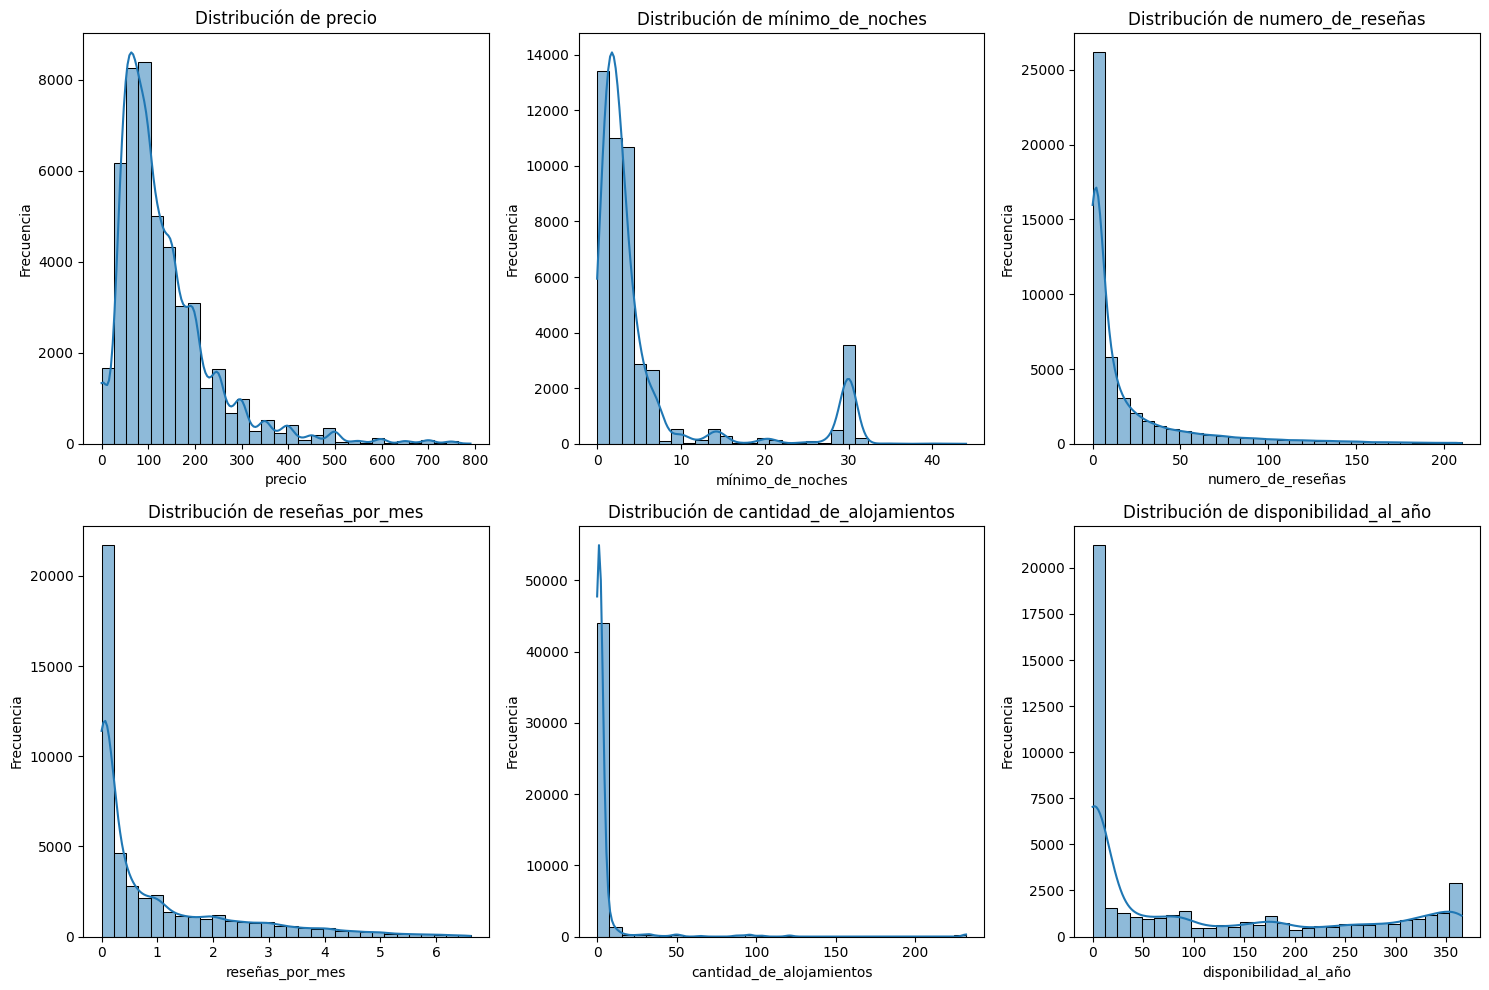

In [3]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    limit = df[col].quantile(0.99)
    data_to_plot = df[df[col] <= limit][col]
    
    sns.histplot(data_to_plot, bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

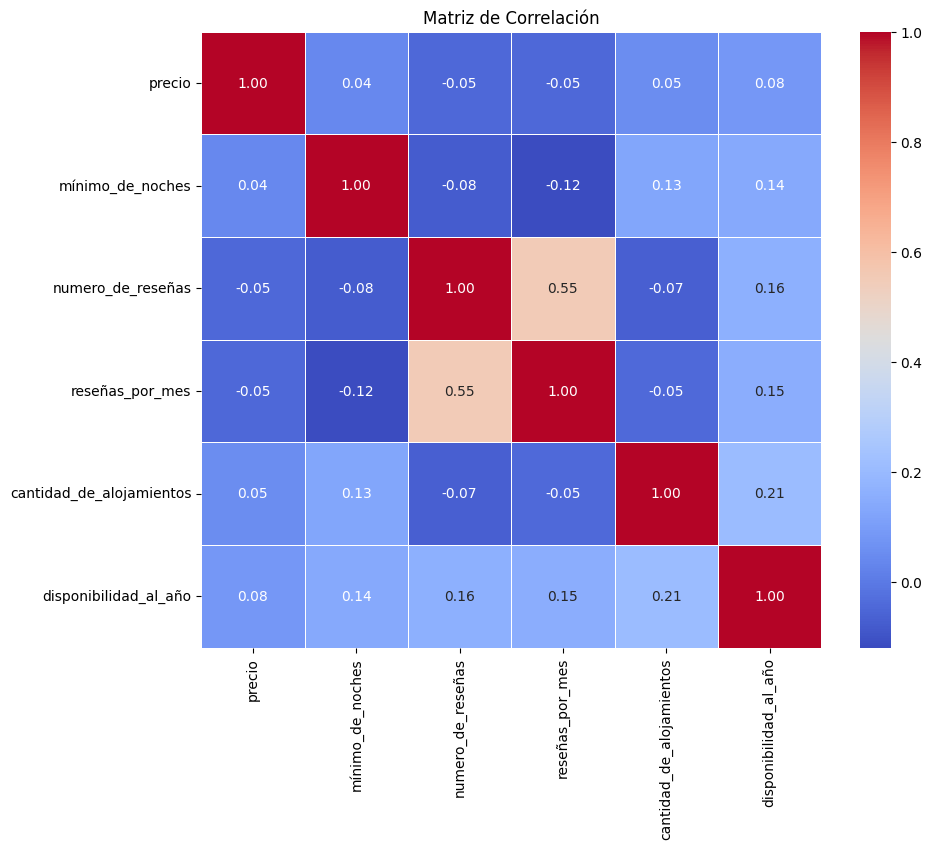

In [4]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

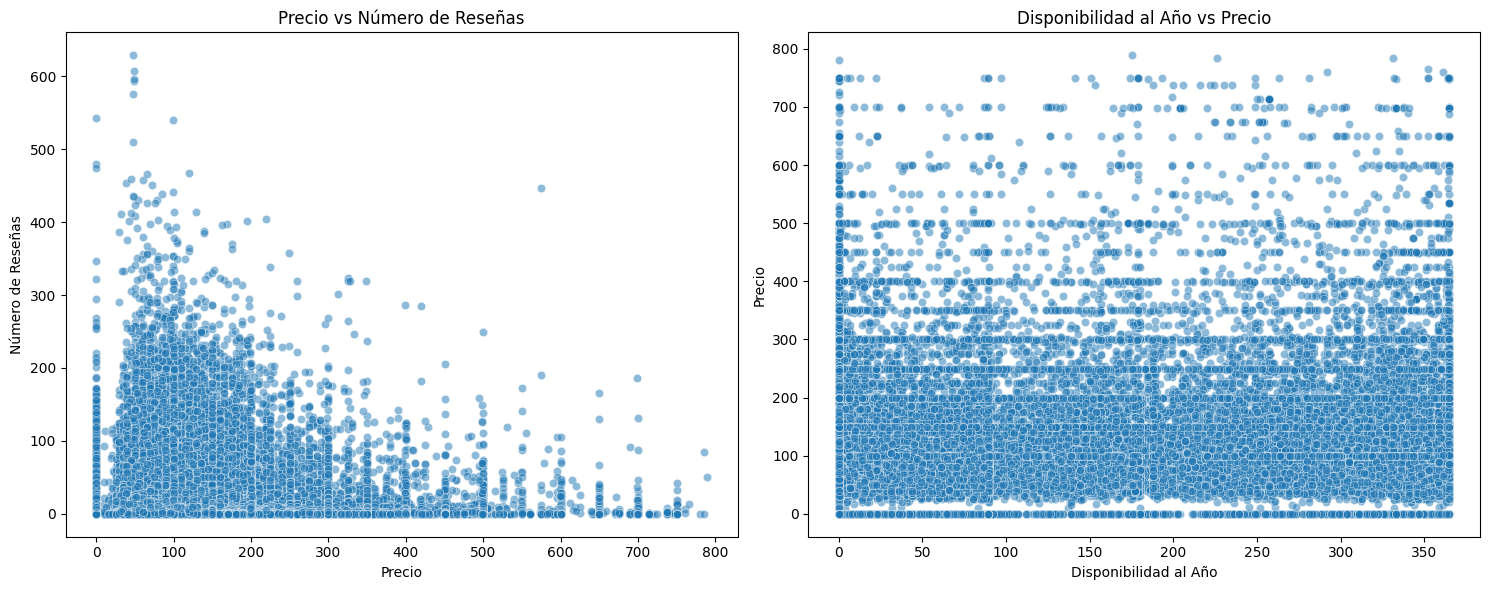

In [5]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='precio', y='numero_de_reseñas', data=df[df['precio'] < df['precio'].quantile(0.99)], alpha=0.5)
plt.title('Precio vs Número de Reseñas')
plt.xlabel('Precio')
plt.ylabel('Número de Reseñas')

plt.subplot(1, 2, 2)
sns.scatterplot(x='disponibilidad_al_año', y='precio', data=df[df['precio'] < df['precio'].quantile(0.99)], alpha=0.5)
plt.title('Disponibilidad al Año vs Precio')
plt.xlabel('Disponibilidad al Año')
plt.ylabel('Precio')

plt.tight_layout()
plt.show()